In [151]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [1]:
data = pd.read_csv('login_percentage.csv')
data.head()

,Tenure,Login %
0,1,1.000
1,2,0.460
2,3,0.325
3,4,0.263
4,5,0.225


In [38]:
## power function y=a(x+b)^c  
## rational function y= a/(x+b)

def login(t,c0,c1,c2,c3,c4,c5,c6):
    return c3*(c0*(t+c1)**c2) + c6*(c4/(t+c5))

In [47]:
# guess of function parameter
g = [10,0.01,-2,10,0.01,10,1]

In [157]:
n = len(data['Tenure'])
y = np.empty(n)

In [158]:
from scipy.optimize import curve_fit
t=data['Tenure'].values
lg=data['Login %']
c,cov=curve_fit(login,t,lg,g)
print(c)

[-7.53817115e-01 -5.40096415e-01 -6.95938640e-01 -7.53924315e-01
 -2.89975330e-01  3.56419592e+02 -2.96684289e+01]


C:\Users\chimoon.hwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


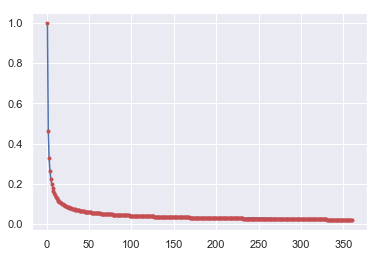

In [159]:
for i in range(n):
    y[i]=login(data['Tenure'][i],c[0],c[1],c[2],c[3],c[4],c[5],c[6])
    
plt.plot(data['Tenure'],data['Login %'])
plt.plot(data['Tenure'],y,'r.')

In [160]:
## R square
from sklearn.metrics import r2_score

print('R^2 : ', r2_score(lg,y))


R^2 :  0.9991201809340623


## Predict 360-day login % with recent 30-day data

In [55]:
data_mth = pd.read_csv('login_percentage_1month.csv') ## recent 30-day new accounts login trend data
data_mth.head()

,Tenure,Login %
0,1,1.000
1,2,0.421
2,3,0.277
3,4,0.212
4,5,0.178


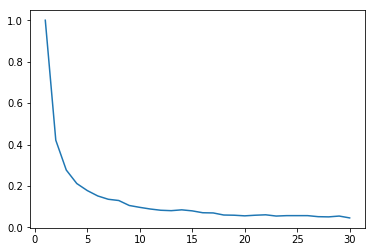

In [61]:
plt.plot(data_mth['Tenure'],data_mth['Login %'])

In [124]:
n = len(data_mth['Tenure'])
y = np.empty(n)

### Curve Fit - fining parameter with recent 30-day new user login data

In [125]:
from scipy.optimize import curve_fit
t=data_mth['Tenure'].values
lg=data_mth['Login %']
c,cov=curve_fit(login,t,lg,g)
print(c)
#c3*(c0*(t+c1)**c2) + c6*(c4/(t+c5))

[  9.05305541   2.34603631 -16.5384993    7.52238157  -0.0856447
  -0.11231747 -10.24416957]


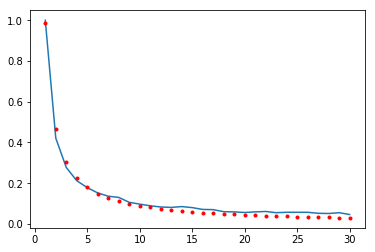

In [126]:
for i in range(n):
    y[i]=login(data_mth['Tenure'][i],c[0],c[1],c[2],c[3],c[4],c[5],c[6])
    
plt.plot(data_mth['Tenure'],data_mth['Login %'])
plt.plot(data_mth['Tenure'],y,'r.')

In [127]:
## R square
from sklearn.metrics import r2_score

print('R^2 : ', r2_score(lg,y))

R^2 :  0.9898154009706985


### get 360-day login % trend prediction

In [163]:
data_f = pd.DataFrame(data={'Tenure':range(1,360)})

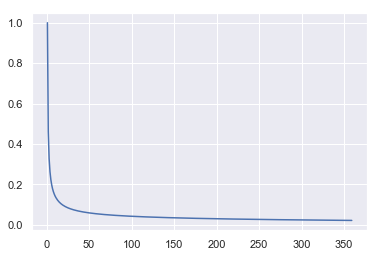

In [164]:
for i in range(m):
    z[i]=login(data_f['Tenure'][i],c[0],c[1],c[2],c[3],c[4],c[5],c[6])
    
plt.plot(data_f['Tenure'],z)

In [150]:
np.savetxt("360_fcst.csv", z, delimiter=",") ## export 